# JAMBOREE PRODUCTIONS |  Supervised Machine Learning

### This script contains the following points:

#### 1. Importing Libraries
#### 2. Importing Data
#### 3. Cleaning the Data
        Check for missing values
        Check for duplicates
        Check extreme values
        Recheck for missing values
#### 4. Data Prep for Regression Analyses
        Hypothesis #1
        Hypothesis #2
#### 5. Regression Analysis
        Interpretations from Visualizations
        Final Reflections

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# View visualizations without directly calling them
%matplotlib inline

## 2. Importing Data

In [3]:
# Set project folder as a string
path = r'/Users/matthewjones/Documents/CareerFoundry/Data Immersion/Achievement 6/Jamboree Entertainment Analysis'

In [4]:
df_movies = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'clean_movies.csv'), index_col = False)

## 3. Cleaning the Data

In [5]:
df_movies.columns

Index(['Unnamed: 0', 'id', 'title', 'vote_average', 'vote_count',
       'release_date', 'revenue', 'runtime', 'budget', 'synopsis', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'original_language', 'action', 'adventure', 'animation', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'history',
       'horror', 'music', 'mystery', 'romance', 'science_fiction', 'tv_movie',
       'thriller', 'war', 'western', 'runtime_category', 'budget_category'],
      dtype='object')

In [6]:
# Drop unnecessary column
df_movies = df_movies.drop('Unnamed: 0', axis = 1)

In [7]:
df_movies.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'budget', 'synopsis', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'original_language',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'documentary',
       'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery',
       'romance', 'science_fiction', 'tv_movie', 'thriller', 'war', 'western',
       'runtime_category', 'budget_category'],
      dtype='object')

In [8]:
df_movies.shape

(490711, 35)

In [9]:
df_movies.head(5)

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,synopsis,genres,...,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,runtime_category,budget_category
0,27205,Inception,8.364,34495,2010-07-15,8.255328e+08,148,160000000.0,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",...,0,0,0,1,0,0,0,0,Long Films,High-Budget
1,157336,Interstellar,8.417,32571,2014-11-05,7.017292e+08,169,165000000.0,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",...,0,0,0,1,0,0,0,0,Long Films,High-Budget
2,155,The Dark Knight,8.512,30619,2008-07-16,1.004558e+09,152,185000000.0,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",...,0,0,0,0,0,1,0,0,Long Films,High-Budget
3,19995,Avatar,7.573,29815,2009-12-15,2.923706e+09,162,237000000.0,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",...,0,0,0,1,0,0,0,0,Long Films,High-Budget
4,24428,The Avengers,7.710,29166,2012-04-25,1.518816e+09,143,220000000.0,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",...,0,0,0,1,0,0,0,0,Long Films,High-Budget


### Check for missing values

In [10]:
df_movies.isnull().sum()

# There are quite a few, will recheck this when I've checked for extreme values

id                           0
title                        1
vote_average                 0
vote_count                   0
release_date             25852
revenue                      0
runtime                      0
budget                       0
synopsis                 21388
genres                  142442
production_companies    186753
production_countries    144820
spoken_languages        126597
original_language            0
action                       0
adventure                    0
animation                    0
comedy                       0
crime                        0
documentary                  0
drama                        0
family                       0
fantasy                      0
history                      0
horror                       0
music                        0
mystery                      0
romance                      0
science_fiction              0
tv_movie                     0
thriller                     0
war                          0
western 

### Check for duplicates

In [11]:
dups = df_movies.duplicated()

In [12]:
dups.shape

# No duplicates

(490711,)

### Check extreme values

/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_65764/580334135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_movies['runtime'], bins=50, color = '#B9839A', kde = True)


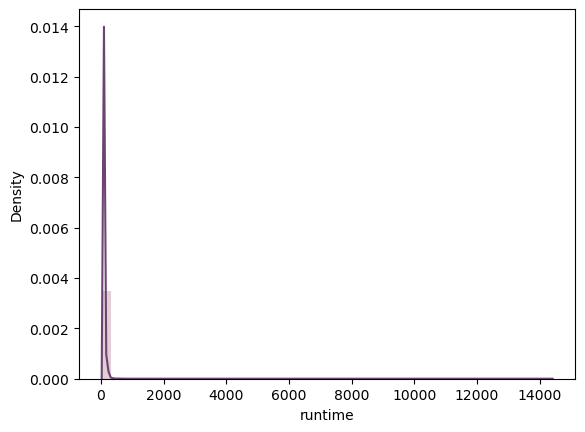

In [13]:
# Plot the frequency of runtime (one of the predictor variables)
ax = sns.distplot(df_movies['runtime'], bins=50, color = '#B9839A', kde = True)
ax.lines[0].set_color('#6C4471')

In [14]:
df_movies['runtime'].max()

# The histogram is so skewed we can't get any meaningful information from this. And a film that is 240 hours
# long is definitely an outlier.

14400

In [15]:
df_movies = df_movies.loc[df_movies['runtime'] < 874]

# The longest cinematic film released is Peter Watkins' Resan (The Journey) - at 14 hours and 33 min (873 min)
# There are experimental films that are longer than this, but even 14.5 hours long is quite the outlier.

In [16]:
# Subset the data to only include films that have a budget, a revenue, and at least 150 votes
df_voted_movies = df_movies.loc[(df_movies['budget'] > 0) & (df_movies['revenue'] > 0) & 
                                (df_movies['vote_count'] >= 150)]

In [17]:
df_voted_movies.shape

(9460, 35)

/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_65764/862372579.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df_voted_movies['runtime'], bins=50, color = '#B9839A', kde = True)


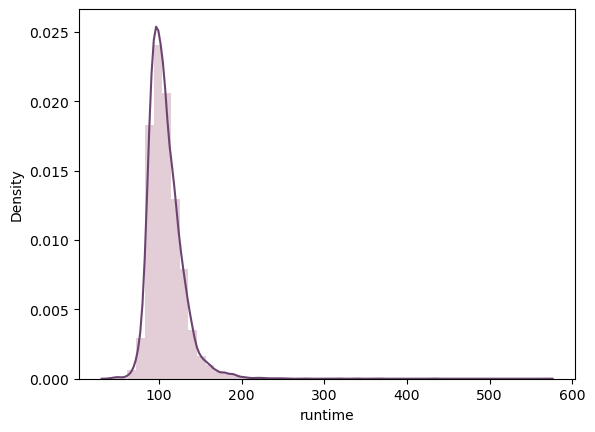

In [18]:
# Replot the frequency of runtime
ax2 = sns.distplot(df_voted_movies['runtime'], bins=50, color = '#B9839A', kde = True)
ax2.lines[0].set_color('#6C4471')

/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_65764/2319694652.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax3 = sns.distplot(df_voted_movies['budget'], bins=50, color = '#B9839A', kde = True)


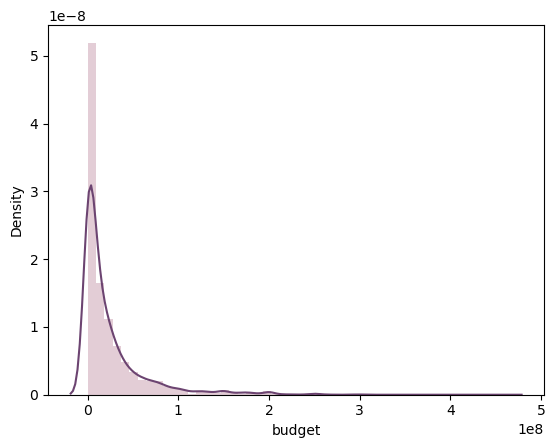

In [19]:
# Plot the frequency of budget (one of the predictor variables)
ax3 = sns.distplot(df_voted_movies['budget'], bins=50, color = '#B9839A', kde = True)
ax3.lines[0].set_color('#6C4471')

/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_65764/3356342120.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax4 = sns.distplot(df_voted_movies['revenue'], bins=50, color = '#B9839A', kde = True)


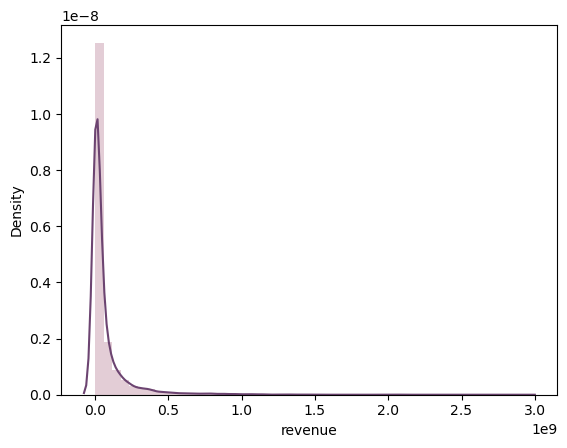

In [20]:
# Plot the frequency of revenue (one of the dependent variables)
ax4 = sns.distplot(df_voted_movies['revenue'], bins=50, color = '#B9839A', kde = True)
ax4.lines[0].set_color('#6C4471')

/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_65764/3048267556.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax5 = sns.distplot(df_voted_movies['vote_count'], bins=50, color = '#B9839A', kde = True)


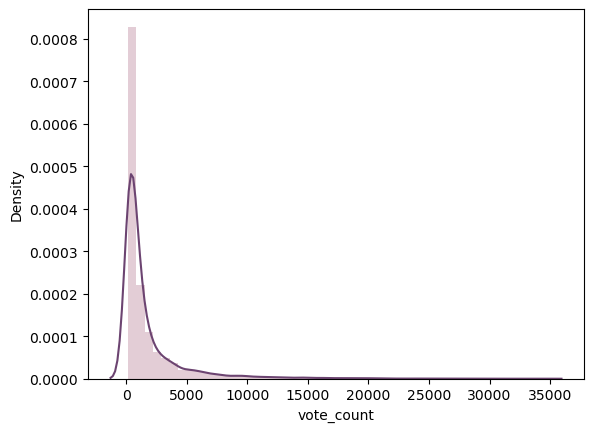

In [21]:
# Plot the frequency of runtime (one of the dependent variables)
ax5 = sns.distplot(df_voted_movies['vote_count'], bins=50, color = '#B9839A', kde = True)
ax5.lines[0].set_color('#6C4471')

/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_65764/1696990049.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax6 = sns.distplot(df_voted_movies['vote_average'], bins=50, color = '#B9839A', kde = True)


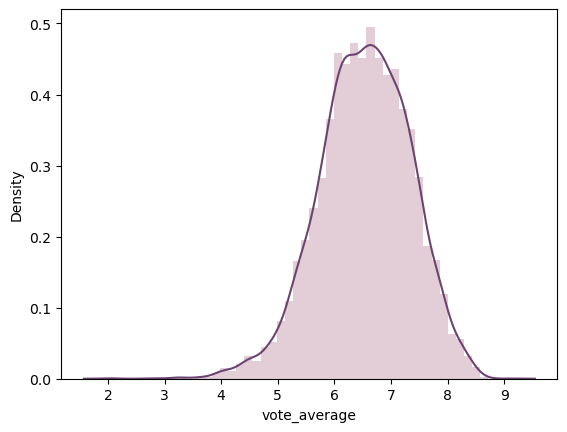

In [22]:
# Plot the frequency of vote average (one of the dependent variables)
ax6 = sns.distplot(df_voted_movies['vote_average'], bins=50, color = '#B9839A', kde = True)
ax6.lines[0].set_color('#6C4471')

Although the histogram for some of these variables are still skewed, they are not so skewed that we can't see any other value frequency than 0. There are likely outliers that we could eliminate, but we will check our model to see if removing more outliers is necessary.

### Recheck for missing values

In [23]:
df_voted_movies.isnull().sum()

# There are far fewer missing values, and no missing values in the variables we are using for this analysis.

id                      0
title                   0
vote_average            0
vote_count              0
release_date            0
revenue                 0
runtime                 0
budget                  0
synopsis                2
genres                  0
production_companies    1
production_countries    0
spoken_languages        0
original_language       0
action                  0
adventure               0
animation               0
comedy                  0
crime                   0
documentary             0
drama                   0
family                  0
fantasy                 0
history                 0
horror                  0
music                   0
mystery                 0
romance                 0
science_fiction         0
tv_movie                0
thriller                0
war                     0
western                 0
runtime_category        0
budget_category         0
dtype: int64

## 4. Data Prep for Regression Analyses

Text(0, 0.5, 'Revenue ($)')

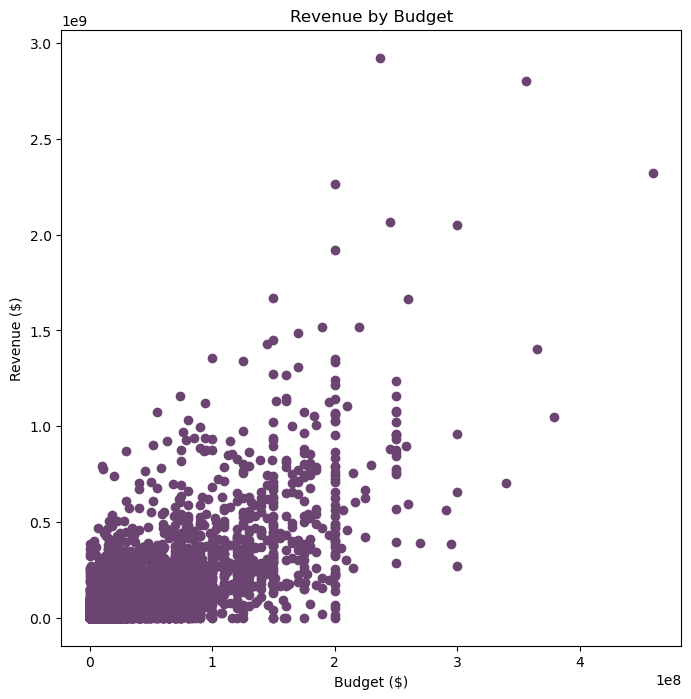

In [24]:
# Plot two variables against each other with a scatterplot

df_voted_movies.plot(x = 'budget', y = 'revenue',style = 'o', color = '#6C4471', legend = False, figsize = (8,8))

# Format title and axes
plt.title('Revenue by Budget')  
plt.xlabel('Budget ($)')  
plt.ylabel('Revenue ($)')  

Text(0, 0.5, 'Vote Average')

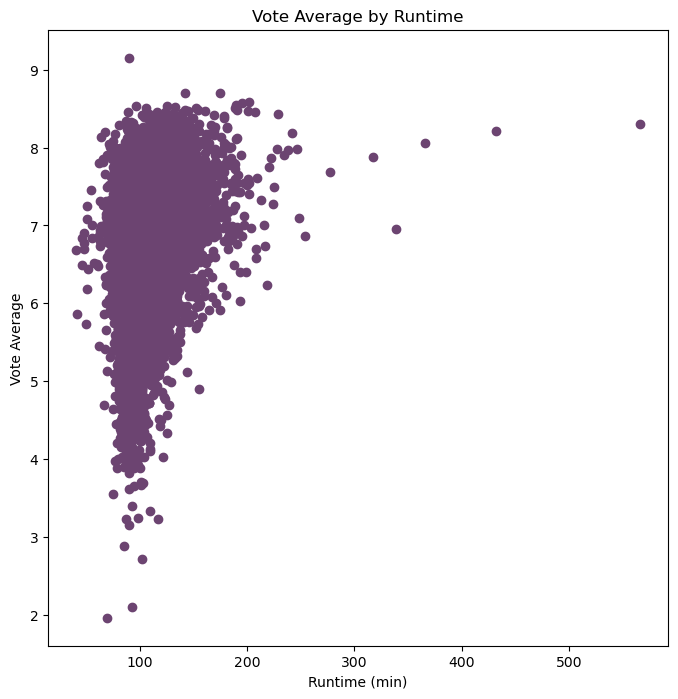

In [25]:
# Plot two variables against each other with a scatterplot

df_voted_movies.plot(x = 'runtime', y = 'vote_average',style = 'o', color = '#6C4471', legend = False, figsize = (8,8))

# Format title and axes
plt.title('Vote Average by Runtime')  
plt.xlabel('Runtime (min)')  
plt.ylabel('Vote Average') 

### Hypothesis #1:
        Films with a higher budget have higher revenues than films with lower budgets.

### Hypothesis #2:
        Films with a longer runtime will have higher vote averages than films with a shorter runtime.

In [26]:
# Reshape variables into NumPy arrays
X = df_voted_movies['budget'].values.reshape(-1,1)
y = df_voted_movies['revenue'].values.reshape(-1,1)

# Repeating the process for runtime and vote average
X2 = df_voted_movies['runtime'].values.reshape(-1,1)
y2 = df_voted_movies['vote_average'].values.reshape(-1,1)

In [27]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Repeating the process for second set of variables
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

## 5. Regression Analysis

In [28]:
# Create a regression object
regression = LinearRegression()

# Repeating the process for second regression analysis
regression2 = LinearRegression()

In [29]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Fit the second regression object onto the training set
regression2.fit(X2_train, y2_train)

LinearRegression()

In [31]:
# Predict the values of y using X_test
y_predicted = regression.predict(X_test)

y2_predicted = regression2.predict(X2_test)

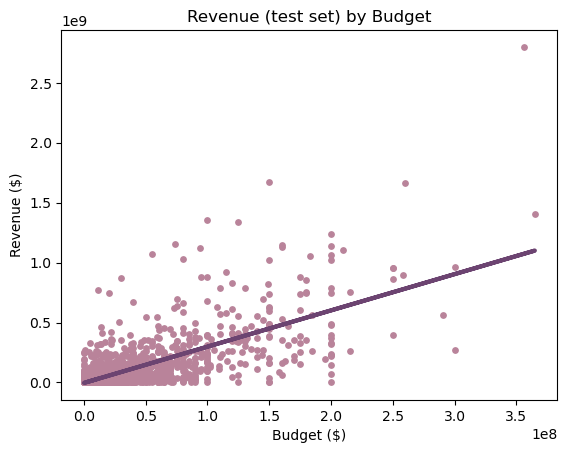

In [32]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color = '#B9839A', s = 15)
plot_test.plot(X_test, y_predicted, color = '#6C4471', linewidth = 3)

# Format title and axes
plot_test.title('Revenue (test set) by Budget')
plot_test.xlabel('Budget ($)')
plot_test.ylabel('Revenue ($)')
plot_test.show()

### Interpretation from Visualization:
        This linear model does a good job at describing the data. Although there are plenty of observations in 
        the test data that are far from the regression line, the line follows the general shape of the data. So 
        either we'll need to iterate on this model, or look at multiple predictor variables to predict revenue.

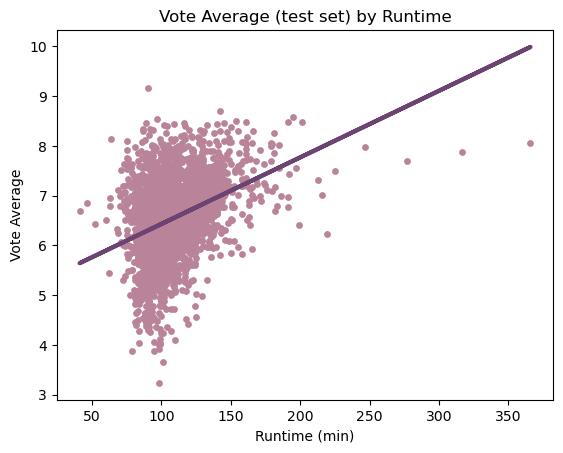

In [33]:
# Create a plot that shows the regression line from the model on the test set
plot_test2 = plt
plot_test2.scatter(X2_test, y2_test, color = '#B9839A', s = 15)
plot_test2.plot(X2_test, y2_predicted, color = '#6C4471', linewidth = 3)

# Format title and axes
plot_test2.title('Vote Average (test set) by Runtime')
plot_test2.xlabel('Runtime (min)')
plot_test2.ylabel('Vote Average')
plot_test2.show()

### Interpretation from Visualization:
        This linear model does not do good job at describing the data. The line does not follow the shape of the 
        data, nor does it intersect with many points of the data. The majority of the data points are far from 
        the regression line. Again we'll need to iterate on this model (likely choosing a different shape of 
        regression), or look at multiple predictor variables to predict vote average.

In [34]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.02600412]]
Mean squared error:  1.2485984808869928e+16
R2 score:  0.5157471408619786


In [35]:
# Create a dataframe comparing the actual and predicted values of y.
compare_data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare_data.head(10)

,Actual,Predicted
0,1.010000e+07,1.110148e+07
1,3.705698e+08,4.196120e+08
2,1.600000e+06,-3.185182e+06
3,2.746610e+05,-1.002533e+06
4,7.294978e+05,2.017950e+07
5,9.793496e+06,1.170116e+08
6,3.221568e+06,5.049475e+06
7,7.766240e+06,6.562477e+06
8,1.800000e+06,7.222893e+05
9,3.777969e+06,-3.185182e+06


### Final Reflections:
        This model performed well in modeling the data. In addition to the visualization, the R2 score was 
        0.52. But the mean squared error was many orders of magnitude too high. When comparing the actual 
        data with the predicted data, we can see that there are a few cases where the predicted values were way 
        off. Sometimes an order of magnitude off. Perhaps, an exponential model would explain this relationship 
        better.
        
        When culling the outliers, we took out hundreds of thousands of films that had no revenue, despite all 
        of them having a runtime of 40+. Dropping that much of the data, while still necessary, could have 
        biased the analysis.

In [36]:
# Create objects that contain the model summary statistics.
rmse2 = mean_squared_error(y2_test, y2_predicted)
r22 = r2_score(y2_test, y2_predicted)

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r22)

Slope: [[0.01336416]]
Mean squared error:  0.5433346593466444
R2 score:  0.13555093808655783


In [37]:
# Create a dataframe comparing the actual and predicted values of y2.
compare_data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
compare_data2.head(10)

,Actual,Predicted
0,6.400,6.323636
1,6.995,6.751289
2,6.600,6.524099
3,6.962,6.510735
4,5.347,6.270180
5,7.132,6.831474
6,6.900,6.430550
7,6.200,6.403821
8,5.900,6.497370
9,6.000,6.564191


### Final Reflections:
        This model did not model the data well. In addition to the visualization, the R2 score was 0.14. In this 
        case, the mean squared error was quite low. When comparing the actual data with the predicted data, we 
        can see that most of the predicted values seem to be quite close to the observed data. This could just 
        be due to the small numbers we're dealing with. I would also look at an exponential model for this 
        relationship.